## Step 1: Importing Required Libraries
I start by importing necessary Python libraries for data handling, visualization, and machine learning.


In [10]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Model explanation library
import shap


## Step 2: Loading the Dataset
I load the IBM HR Analytics Dataset and view basic information about it.


In [11]:
# Load the HR dataset from a CSV file
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the shape (rows, columns) of the dataset
print(df.shape)

# Show the first 5 rows
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Step 3: Initial Data Exploration
I explore the structure, data types, and target variable distribution.


In [12]:
# Show summary of dataset info
df.info()

# Show statistical summary of numeric features
df.describe()

# Check the distribution of the target variable 'Attrition'
df['Attrition'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,count
Attrition,
No,1233
Yes,237


## Step 4: Exploratory Data Analysis (EDA)
Let's visualize how various factors influence attrition.


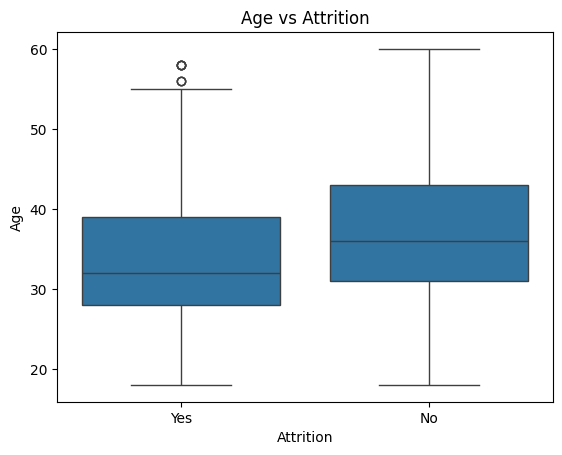

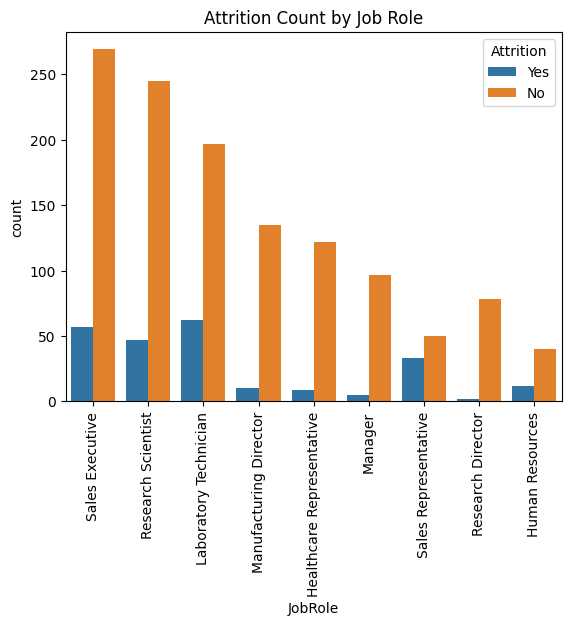

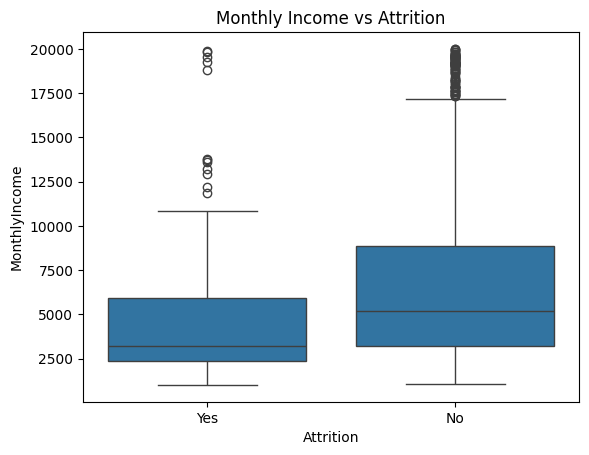

In [13]:
# Boxplot to see age distribution across attrition status
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age vs Attrition')
plt.show()

# Countplot of job roles by attrition
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition Count by Job Role')
plt.xticks(rotation=90)
plt.show()

# Bar plot for MonthlyIncome
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()


## Step 5: Data Preprocessing
I prepare the dataset for modeling by encoding categorical features and dropping irrelevant columns.


In [14]:
# One-hot encoding categorical features and dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, drop_first=True)

## Step 6: Train-Test Split
I split the data into training and testing sets for model evaluation.


In [15]:
# Separate features (X) and target (y)
X = df.drop('Attrition_Yes', axis=1)
y = df['Attrition_Yes']

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 7: Logistic Regression Model
I train and evaluate a Logistic Regression model to predict employee attrition.


In [16]:
# Create logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)

# Evaluate model performance
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
[[368  12]
 [ 51  10]]
              precision    recall  f1-score   support

       False       0.88      0.97      0.92       380
        True       0.45      0.16      0.24        61

    accuracy                           0.86       441
   macro avg       0.67      0.57      0.58       441
weighted avg       0.82      0.86      0.83       441



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Step 8: Random Forest Classifier
I now train a more advanced Random Forest model and evaluate its results.


In [17]:
# Create and train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict using the Random Forest model
y_pred_rf = rf.predict(X_test)

# Evaluate performance
print("Random Forest Results:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
[[377   3]
 [ 56   5]]
              precision    recall  f1-score   support

       False       0.87      0.99      0.93       380
        True       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



## Step 9: Explainability using SHAP
I use SHAP to interpret how each feature impacts the model's predictions.


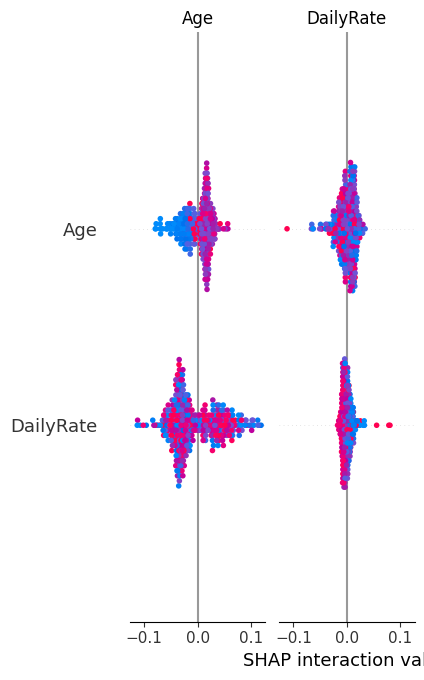

In [18]:
# Initialize the SHAP explainer
explainer = shap.Explainer(rf)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)


## Step 10: Key Insights and HR Recommendations

- Employees working **overtime** are more likely to leave the company.
- **Low monthly income** is a major contributor to attrition.
- **Job satisfaction** and **work-life balance** are critical for employee retention.
- SHAP shows `OverTime`, `Age`, and `JobRole` among the most impactful features.

### Recommendations:
- Implement better workload and overtime management.
- Review compensation packages, especially for junior staff.
- Invest in improving job satisfaction and flexible work policies.
